<a href="https://colab.research.google.com/github/DaniilAszn/Math_modeling_2_course/blob/main/MMAP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 1**

Задать диагональную матрицу:

$$(a_{ij}) = A: \forall a_{ij} \in ℂ$$

\begin{equation*}
    a_{ij}=
    \begin{cases}
        \alpha_i + i \cdot \beta_j, i=j
        \\
        0, i \ne j
    \end{cases}
\end{equation*}


и вектор f:

$$f = (1 .. N)$$


$$i,j = 1,..,N$$

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
N = int(input("Введите значение N: "))

Введите значение N: 25


In [ ]:
def x(i):
    return i


def A_elements(i, j):
    a = random.randint(1, 16)
    b = random.randint(1, 16)
    return (complex(a, b)) * (i == j) + 0 * (i != j)


def f_elements(i, j):
    return x(i) + 1

In [ ]:
rows, cols = N, N

A = np.fromfunction(np.vectorize(A_elements), (rows, cols), dtype=int)

In [ ]:
rows, cols = N, 1

f = np.fromfunction(f_elements, (rows, cols))

# **Задание 2**

Реализовать на любом языке программирования обобщенный метод простой итерации

Обобщённый метод простой итерации:
1. $u_0 = \overrightarrow 0$
2. $u_{k+1} = u_k - \frac{1}{\mu} \cdot (Au_k - f)$
3. $\frac{\lVert u_k - u_{k-1} \rVert}{\lVert f \rVert} < \varepsilon$

## А как искать мюшку?



1) Находим $\sigma(A)$ - спектр оператора А (набор ненулевых собственных значений оператора).

$\sigma(A)$ = {$\lambda_i \ne 0 | \lambda_i \in ℂ, i=1,..,m$}

2) Поиск мюшки, которой соотвествует минимальный радиус окружности, покрывающий спектр оператора А.

2.1) Перебираем $C_N^2$ пар $(\lambda_i, \lambda_j), i \ne j$ для вычисления соответствующих им значений $\mu, R$ по следующим правилам:

$\mu_0 = \frac{\lambda_1 + \lambda_2}{2} + \frac{i \cdot Im(\lambda_1 \cdot \overline{\lambda_2}) \cdot (\lambda_2 - \lambda_1)}{2 \cdot (|\lambda_1 \cdot \overline{\lambda_2}| + Re(\lambda_1 \cdot \overline{\lambda_2}))}$

$R_0 = \sqrt{\frac{|\lambda_1 - \lambda_2|^2 \cdot |\overline{\lambda_1} \cdot \lambda_2|}{2 \cdot (|\overline{\lambda_1} \cdot \lambda_2| + Re(\overline{\lambda_1} \cdot \lambda_2))}}$

Пример ситуации, которая может получиться. Многоугольник, составленный из элементов $\sigma(A)$, находится вне образованной окружности.

**ЭТА СИТУАЦИЯ НЕ БРО**

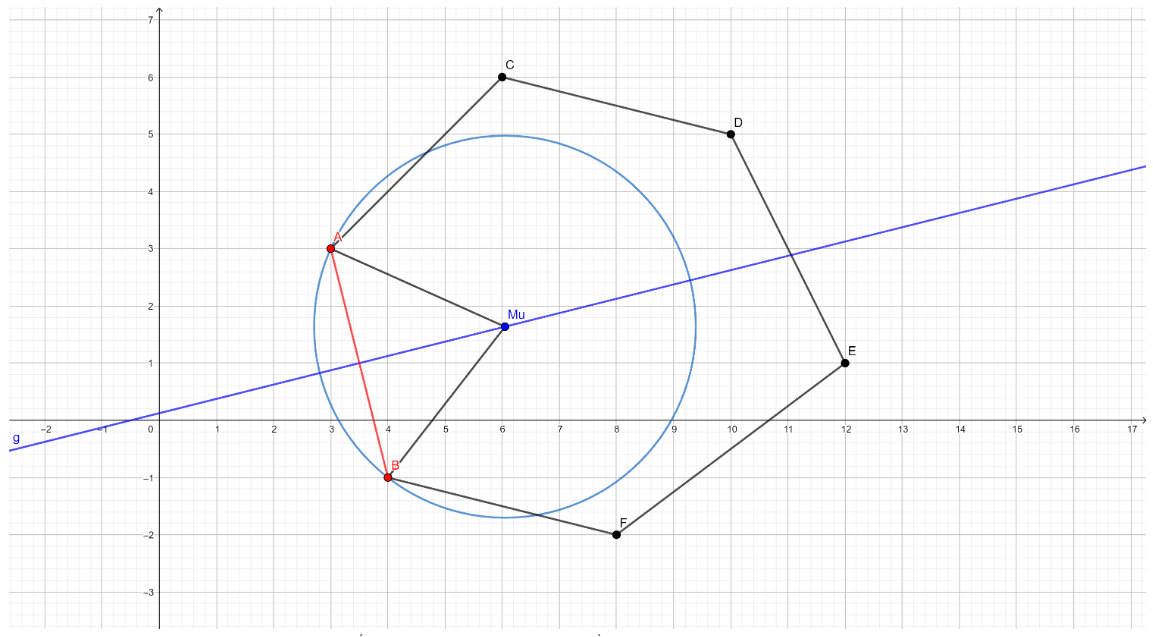

2.2) Перебираем $C_N^3$ троек $(\lambda_i, \lambda_j, \lambda_k), i \ne j, i \ne k, j \ne k$ для вычисления соответствующих им значений $\mu, R$ по следующим правилам:

$\mu_0 = i \cdot \frac{|\lambda_1|^2 \cdot (\lambda_2 - \lambda_3) + |\lambda_2|^2 \cdot (\lambda_3 - \lambda_1) + |\lambda_3|^2 \cdot (\lambda_1 - \lambda_2)}{2 \cdot Im(\lambda_1 \cdot \overline{\lambda_2} + \lambda_2 \cdot \overline{\lambda_3} + \lambda_3 \cdot \overline{\lambda_1})}$

$R_0 = |\mu_0 - \lambda_1|$

Ещё один пример ситуации, которая может получиться. Многоугольник, составленный из элементов $\sigma(A)$, не выходит за границы образованной окружности.

**ЭТА СИТУАЦИЯ БРО**

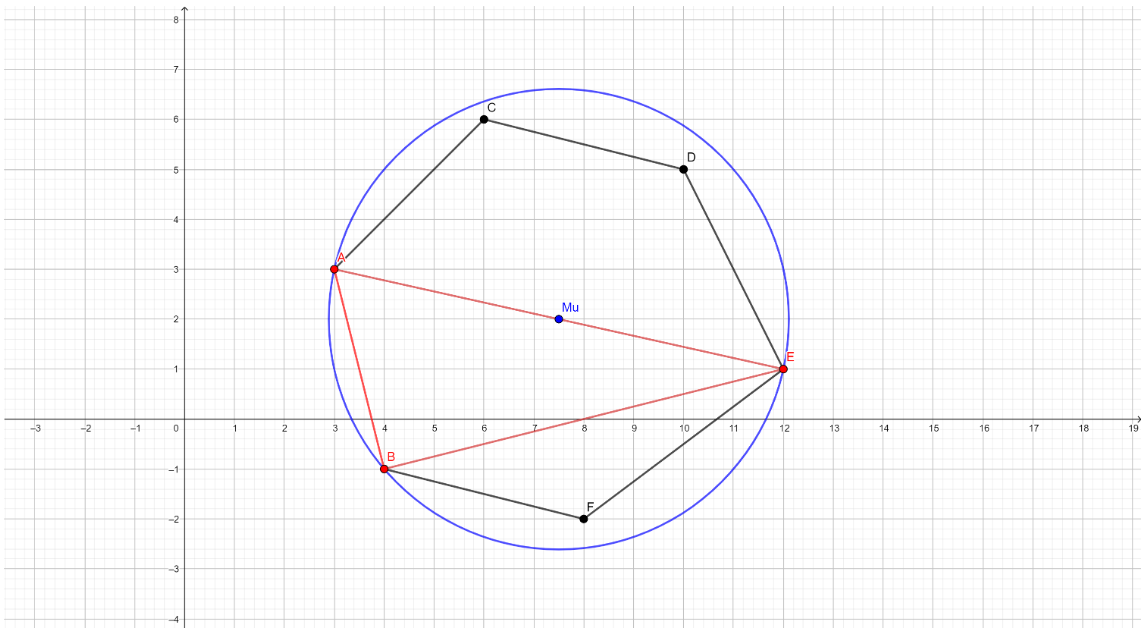

## Небольшой ликбез по комплексным числам в питоне.

1. **Создание комплексных чисел:**
   ```python
   z1 = 3 + 4j  # Комплексное число с действительной частью 3 и мнимой частью 4
   z2 = complex(2, -3)  # Используя функцию `complex(real, imag)`
   ```

2. **Доступ к частям комплексного числа:**
   ```python
   real_part = z1.real  # Действительная часть
   imag_part = z1.imag  # Мнимая часть
   ```

3. **Арифметические операции:**
   Комплексные числа поддерживают стандартные арифметические операции (+, -, *, /).
   ```python
   z3 = z1 + z2
   z4 = z1 - z2
   z5 = z1 * z2
   z6 = z1 / z2
   ```

4. **Комплексно сопряженное число:**
   Для получения комплексно сопряженного числа можно использовать метод `conjugate()`.
   ```python
   z1_conjugate = z1.conjugate()  # Комплексно сопряжённое к z1
   ```

5. **Модуль комплексного числа:**
   Для нахождения модуля (или абсолютной величины) комплексного числа можно использовать функцию `abs()`.
   ```python
   modulus = abs(z1)  # Модуль z1
   ```

In [ ]:
# Ищем спектр оператора А

eigenvalues = np.linalg.eigvals(A)
len_spectrum = len(eigenvalues)

In [ ]:
mu_R_list = [] # набор мюшек и соответствующих им радиусам

In [ ]:
# Функция для проверки нахождения точки внутри окружности

def in_circle(mu, R, spectrum, len_spectrum):
    flag = True
    x0 = mu.real
    y0 = mu.imag

    for i in range(len_spectrum):
        x = spectrum[i].real
        y = spectrum[i].imag
        if (x - x0) ** 2 + (y - y0) ** 2 > R ** 2:
            flag = False
            break

    return flag

In [ ]:
# Перебор пар и троек значений спектра

# Перебор пар
for i in range(len_spectrum):
    for j in range(i + 1, len_spectrum):
        l1 = eigenvalues[i]
        l2 = eigenvalues[j]

        up = 1j * (l1 * l2.conjugate()).imag * (l2 - l1)
        down = 2 * (abs(l1 * l2.conjugate()) + (l1 * l2.conjugate()).real)
        mu = (l1 + l2) / 2 + up / down

        up = abs(l1 - l2) ** 2 * abs(l1.conjugate() * l2)
        down = 2 * (abs(l1.conjugate() * l2) + (l1.conjugate() * l2).real)
        R = (up / down) ** 0.5

        if in_circle(mu, R, eigenvalues, len_spectrum):
            mu_R_list.append([mu, R])

# Перебор троек
for i in range(len_spectrum):
    for j in range(i + 1, len_spectrum):
        for k in range(j + 1, len_spectrum):
            l1 = eigenvalues[i]
            l2 = eigenvalues[j]
            l3 = eigenvalues[k]

            up = abs(l1) ** 2 * (l2 - l3) + abs(l2) ** 2 * (l3 - l1) + abs(l3) ** 2 * (l1 - l2)
            down = 2 * (l1 * l2.conjugate() + l2 * l3.conjugate() + l3 * l1.conjugate()).imag
            mu = 1j * (up / down)

            R = abs(mu - l1)

            if in_circle(mu, R, eigenvalues, len_spectrum):
                mu_R_list.append([mu, R])

In [ ]:
mu = 0 + 0j
R = 10e1000000
for i in range(len(mu_R_list)):
    if mu_R_list[i][1] < R:
        R = mu_R_list[i][1]
        mu = mu_R_list[i][0]

In [ ]:
def generalized_simple_iteration(mu, u_old, A, f, eps):
    steps = 1

    u_new = u_old - (1 / mu) * (A @ u_old - f)

    norm_diff_u = np.linalg.norm(u_new - u_old)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_old = u_new

            u_new = u_old - (1 / mu) * (A @ u_old - f)

            norm_diff_u = np.linalg.norm(u_new - u_old)
    else:
        pass

    return u_new, steps

# Для ОМПИ
u_old = u_old = np.array([[0.]] * N)
eps = 1e-10

u_GMSI, count_steps_GMSI = generalized_simple_iteration(mu, u_old, A, f, eps)

In [ ]:
def error(Arr_num, Arr_ana):
    return np.sqrt(np.sum((Arr_ana - Arr_num) ** 2) / np.sum(Arr_ana ** 2))


def u_ana(A, f):
    return np.linalg.pinv(A) @ f


u_ana_values = u_ana(A, f)

In [ ]:
print(f"delta_GMSI = {abs(error(u_GMSI, u_ana_values))}")
print(f"Число шагов: {count_steps_GMSI}")

delta_GMSI = 1.2048162693150015e-09
Число шагов: 47


**ТЕСТЫ**

In [ ]:
# N = 3

# A = np.array([[16. +6.j,  0. +0.j,  0. +0.j],
#        [ 0. +0.j,  4.+13.j,  0. +0.j],
#        [ 0. +0.j,  0. +0.j, 15.+14.j]])

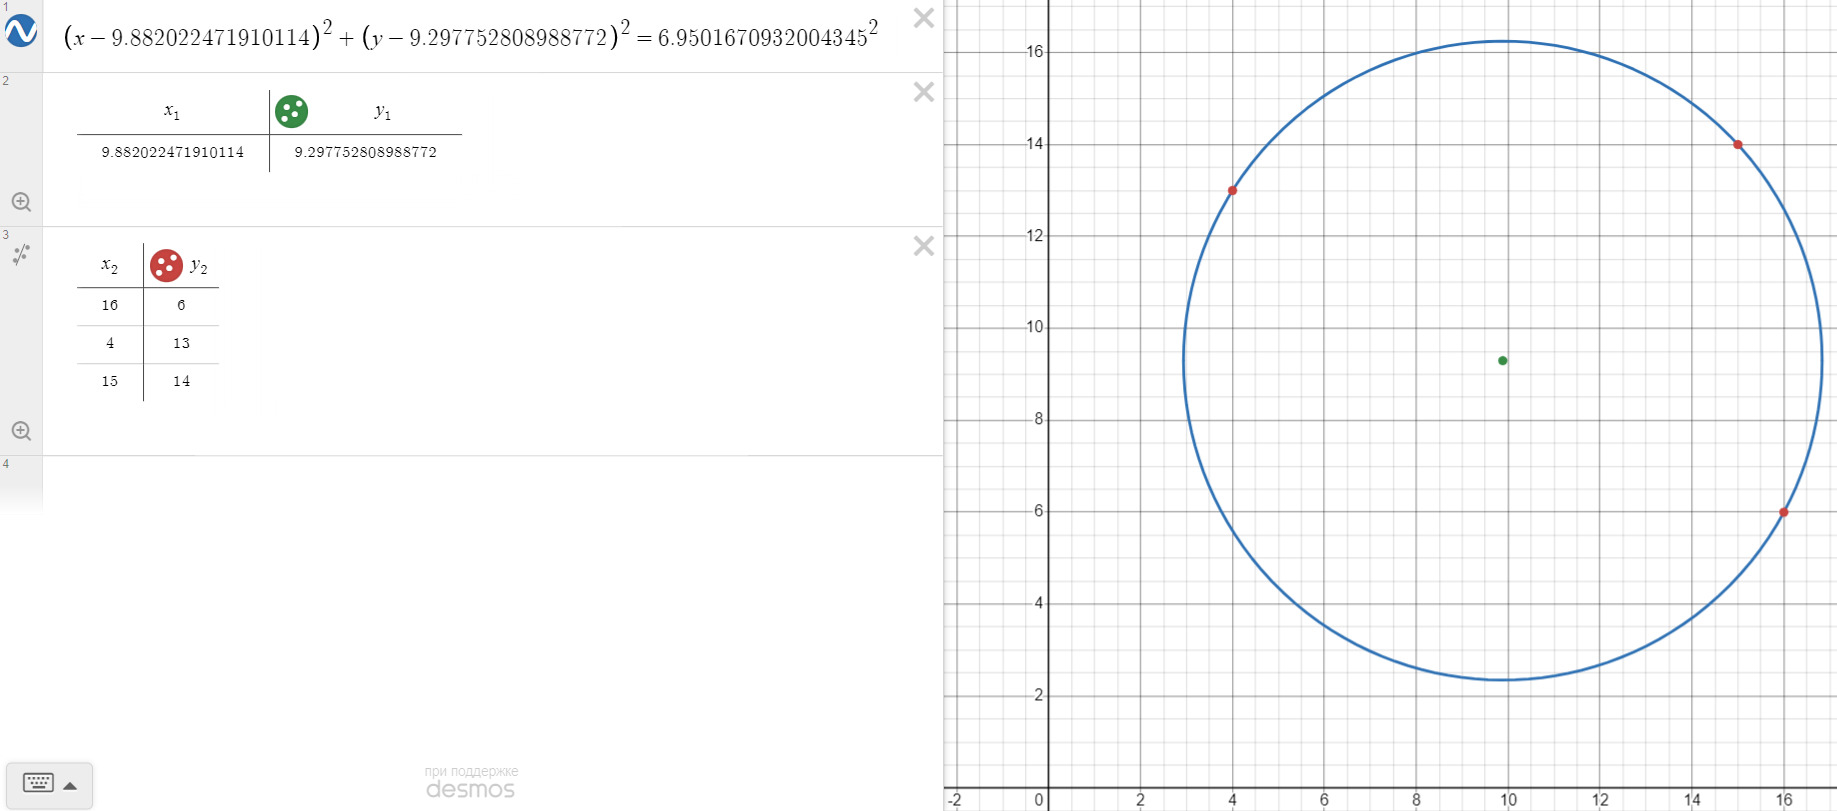

In [ ]:
# N = 5

# A = np.array([[4.+13.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
#        [0. +0.j, 2.+15.j, 0. +0.j, 0. +0.j, 0. +0.j],
#        [0. +0.j, 0. +0.j, 7.+13.j, 0. +0.j, 0. +0.j],
#        [0. +0.j, 0. +0.j, 0. +0.j, 6. +9.j, 0. +0.j],
#        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 5. +6.j]])

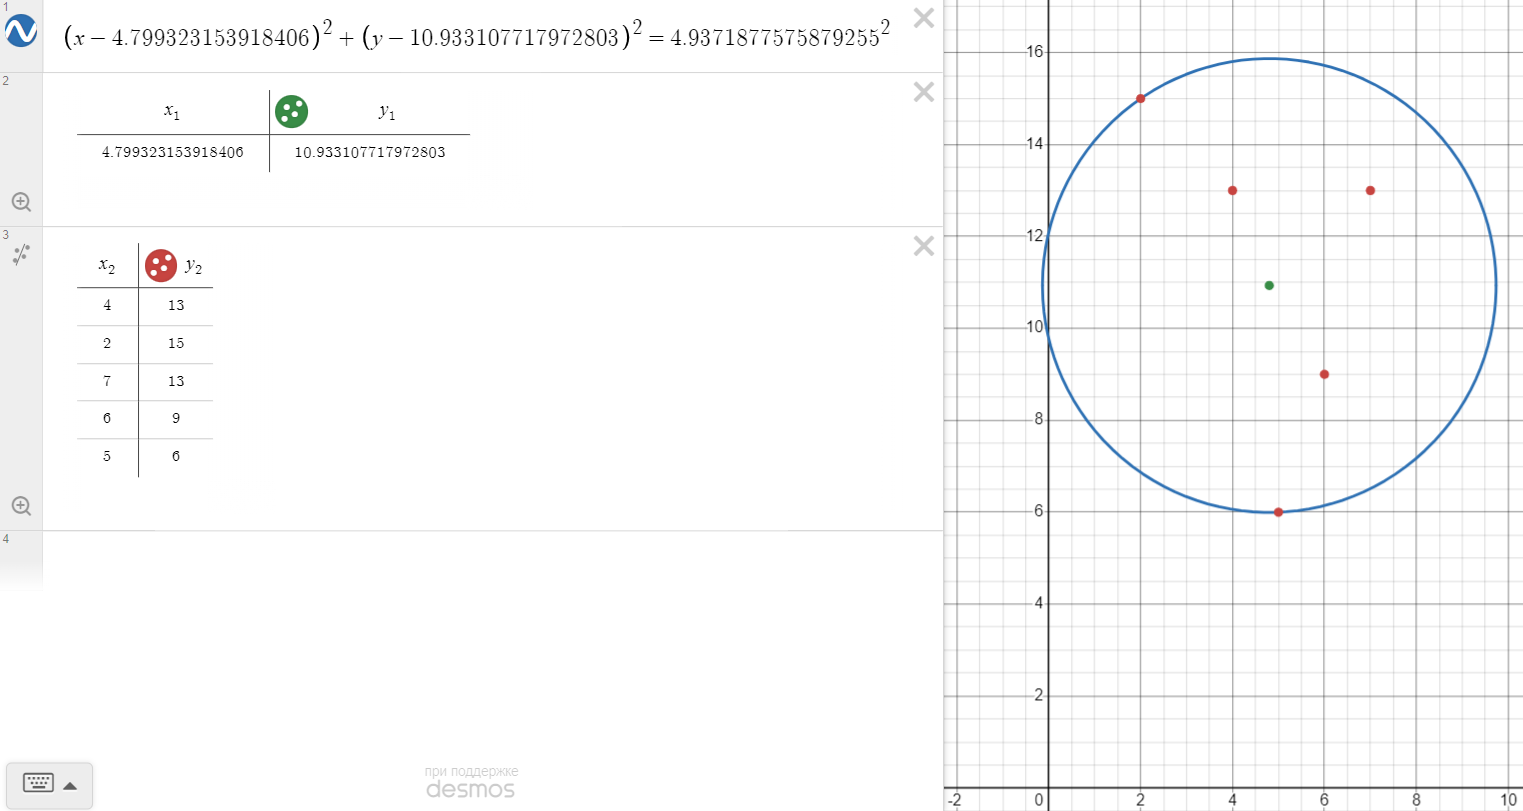

In [ ]:
# N = 5

# A = np.array([[ 1. +2.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
#        [ 0. +0.j,  7. +5.j,  0. +0.j,  0. +0.j,  0. +0.j],
#        [ 0. +0.j,  0. +0.j,  4. +2.j,  0. +0.j,  0. +0.j],
#        [ 0. +0.j,  0. +0.j,  0. +0.j, 10. +7.j,  0. +0.j],
#        [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, 12.+16.j]])

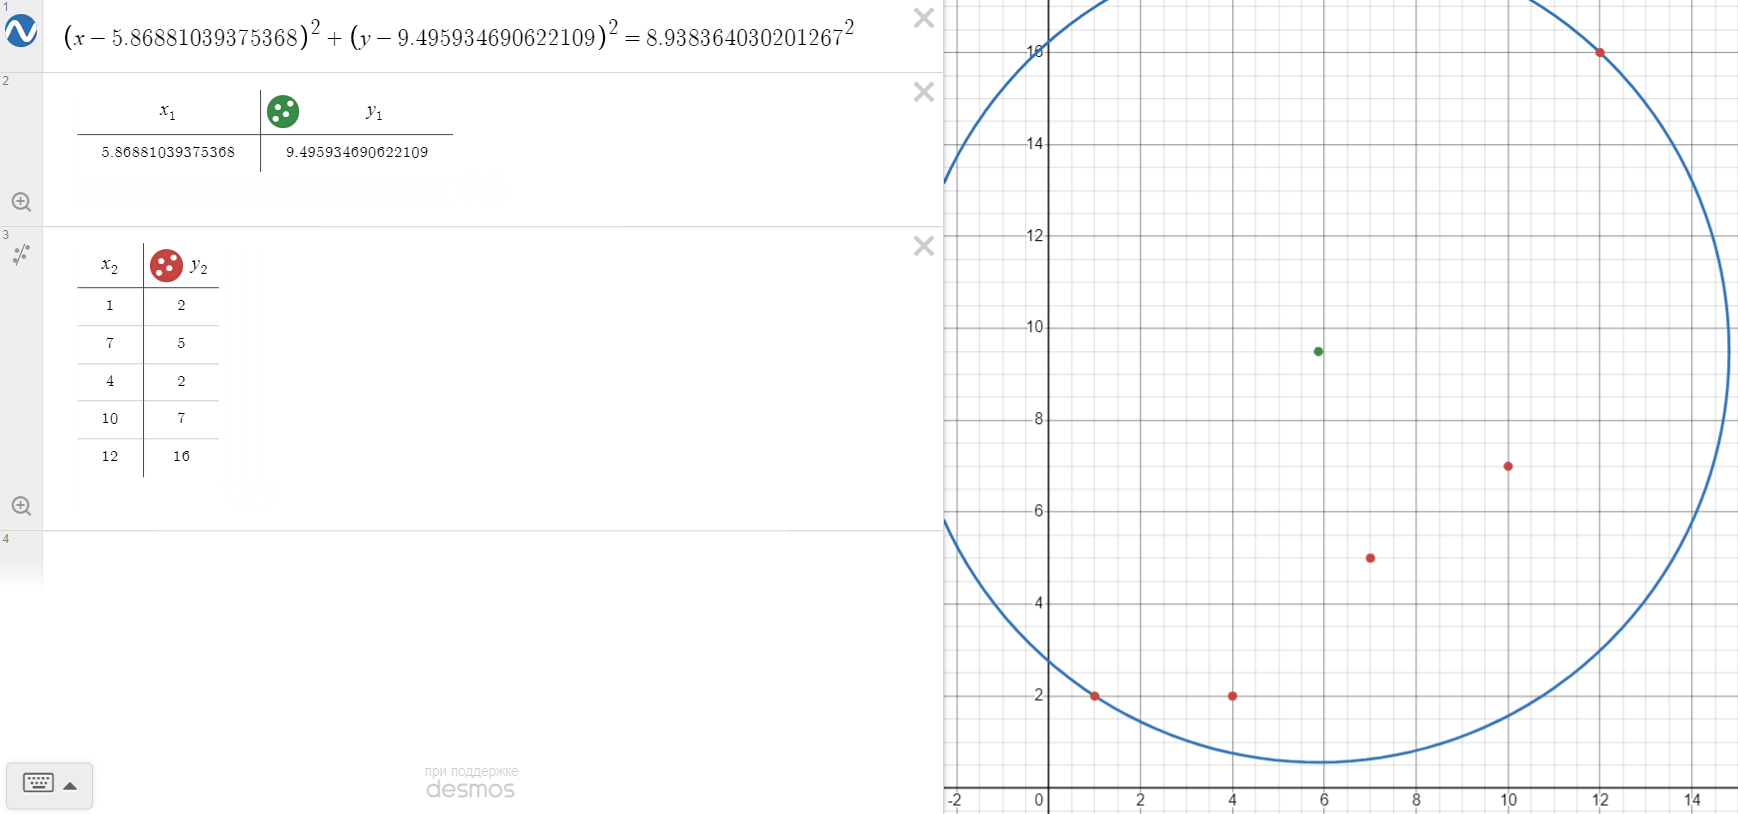

In [ ]:
# N = 7

# A = np.array([[ 2. +7.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, 0. +0.j],
#        [ 0. +0.j,  9. +9.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, 0. +0.j],
#        [ 0. +0.j,  0. +0.j,  3. +6.j,  0. +0.j,  0. +0.j,  0. +0.j, 0. +0.j],
#        [ 0. +0.j,  0. +0.j,  0. +0.j, 11. +2.j,  0. +0.j,  0. +0.j, 0. +0.j],
#        [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  3. +5.j,  0. +0.j, 0. +0.j],
#        [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, 15.+12.j, 0. +0.j],
#        [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, 2.+10.j]])

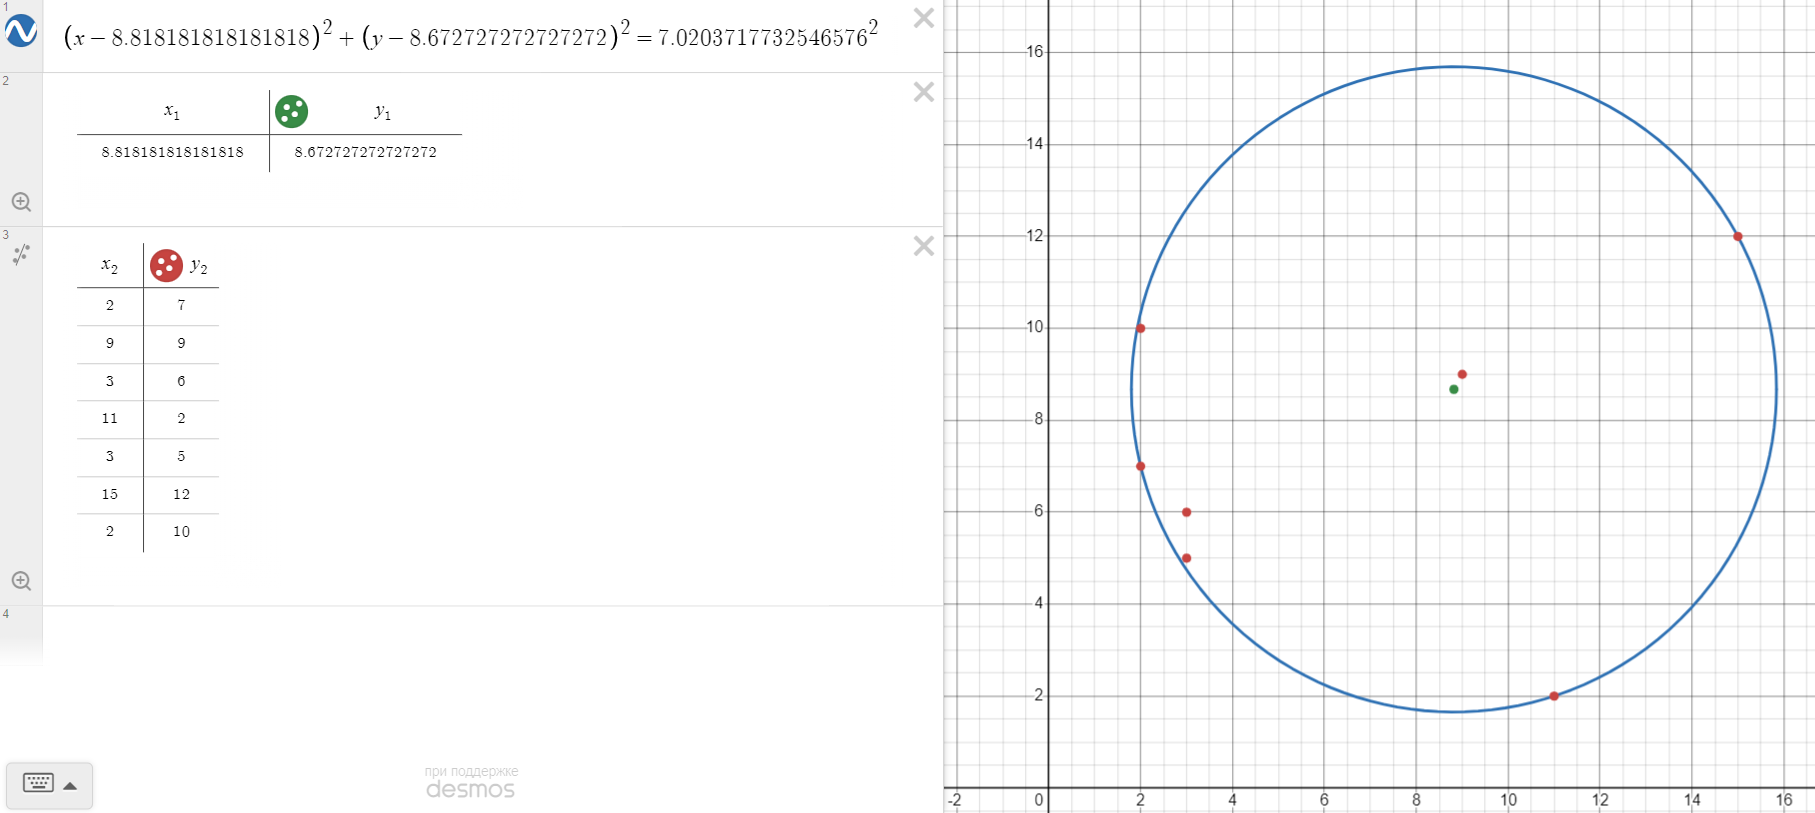